In [ ]:
import pandas as pd
import numpy as np
import tqdm
import torch
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from torch.utils.data.sampler import SubsetRandomSampler
import time
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import r_regression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gi_data = pd.read_csv("/content/drive/MyDrive/GI_Project/gi_data.csv", delimiter="\t")

In [59]:
foodData = pd.read_csv(f"/content/drive/MyDrive/GI_Project/NutritionDataUsdaGiMatched.csv")
foodData['GI'] = gi_data['GI']
# # Drop all columns with 50% or more NaN values
# foodData = foodData.dropna(thresh=foodData.shape[0]*0.5, axis=1)
# # Drop all rows without at least 80% non NaN data
# foodData = foodData.dropna(thresh=foodData.shape[1]*0.8, axis=0)
# foodData

In [60]:
foodData = foodData[['Energy [KCAL]', 'Protein [G]',
          'Carbohydrate, by difference [G]', 'Sugars, total including NLEA [G]',
          'Fiber, total dietary [G]', 'Total lipid (fat) [G]', 'GI']]

In [61]:
for column in foodData.columns:
    foodData[column] = foodData[column].fillna(0)
foodData

,Energy [KCAL],Protein [G],"Carbohydrate, by difference [G]","Sugars, total including NLEA [G]","Fiber, total dietary [G]",Total lipid (fat) [G],GI
0,367.0,6.67,80.00,0.00,3.3,0.00,20
1,382.0,3.64,56.36,32.73,1.8,16.36,37
2,356.0,6.98,81.40,37.21,5.8,2.33,38
3,374.0,5.05,34.34,23.23,1.0,24.24,43
4,29.0,0.33,3.86,2.10,0.1,0.11,53
...,...,...,...,...,...,...,...
4227,472.0,7.55,49.06,28.30,9.4,35.85,55
4228,271.0,8.33,54.17,2.08,2.1,3.12,28
4229,370.0,14.81,66.67,0.00,7.4,11.11,53
4230,372.0,6.98,79.07,6.98,7.0,2.33,42


In [64]:
foodData.iloc[:,:-1]

,Energy [KCAL],Protein [G],"Carbohydrate, by difference [G]","Sugars, total including NLEA [G]","Fiber, total dietary [G]",Total lipid (fat) [G]
0,367.0,6.67,80.00,0.00,3.3,0.00
1,382.0,3.64,56.36,32.73,1.8,16.36
2,356.0,6.98,81.40,37.21,5.8,2.33
3,374.0,5.05,34.34,23.23,1.0,24.24
4,29.0,0.33,3.86,2.10,0.1,0.11
...,...,...,...,...,...,...
4227,472.0,7.55,49.06,28.30,9.4,35.85
4228,271.0,8.33,54.17,2.08,2.1,3.12
4229,370.0,14.81,66.67,0.00,7.4,11.11
4230,372.0,6.98,79.07,6.98,7.0,2.33


In [65]:
X = foodData.iloc[:,:-1]
y = foodData['GI']

In [66]:
foodData.isna().sum()

Energy [KCAL]                       0
Protein [G]                         0
Carbohydrate, by difference [G]     0
Sugars, total including NLEA [G]    0
Fiber, total dietary [G]            0
Total lipid (fat) [G]               0
GI                                  0
dtype: int64

0.08515922452251423
[0.29182053]
18.926757444231626


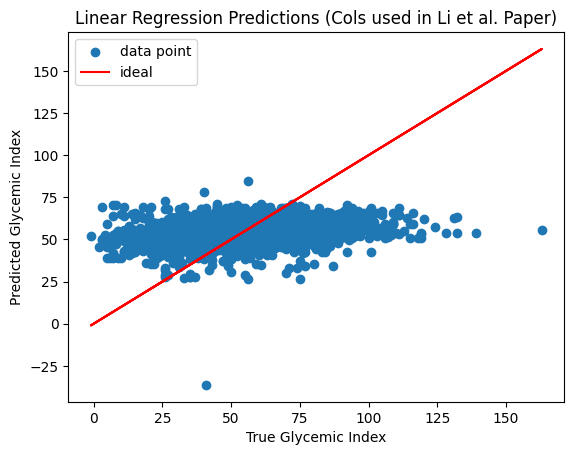

In [68]:
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
print(r2_score(y, y_pred))
print(r_regression(y.to_numpy().reshape(-1,1), y_pred))
print(np.sqrt(mean_squared_error(y, y_pred)))
plt.scatter(y, y_pred)
plt.plot(y,y,'r')
plt.plot(y,y,'r')
plt.title("Linear Regression Predictions (Cols used in Li et al. Paper)")
plt.xlabel("True Glycemic Index")
plt.ylabel("Predicted Glycemic Index")
plt.legend(["data point", "ideal"])
plt.show()